In [1]:
!pip install qiskit
!pip install qiskit-aer
!pip install pylatexenc

# Import libraries

from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=a6b4377a523e1e8368a27b5948fa5e8575d91663aea166230967eafdf531b7d6
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


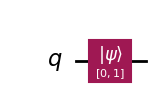

In [2]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw('mpl')  # Let's view our circuit

In [3]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit

In [4]:
result = backend.run(qc).result() # Do the simulation, returning the result

In [5]:
out_state = result.get_statevector()
print(out_state) # Display the output state vector

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


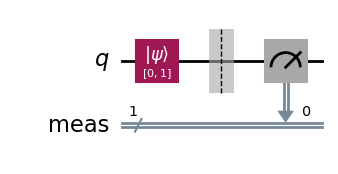

In [6]:
qc.measure_all()
qc.draw('mpl')

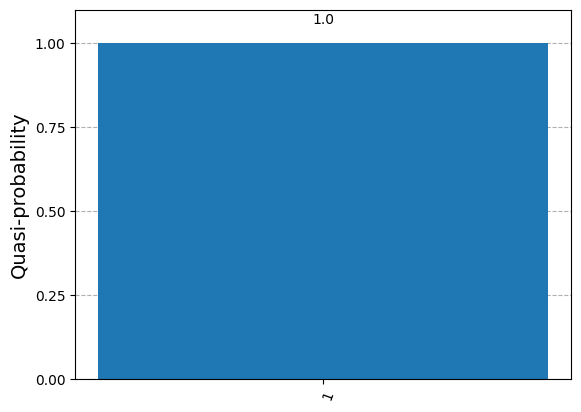

In [7]:
counts = result.get_counts()
plot_histogram(counts)

In [8]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0>

In [9]:
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialise the 0th qubit in the state `initial_state`
state = backend.run(qc).result().get_statevector() # Execute the circuit
print(state)           # Print the result

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


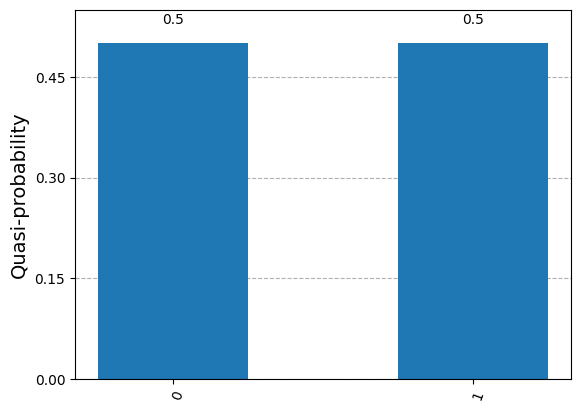

In [10]:
results = backend.run(qc).result().get_counts()
plot_histogram(results)

In [11]:
vector = [1,1] # for unnormalized vector, we should get an error
qc.initialize(vector, 0)

QiskitError: 'Sum of amplitudes-squared is not 1, but 1.4142135623730951.'

In [12]:
from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector
#from qiskit_textbook.widgets import plot_bloch_vector_spherical

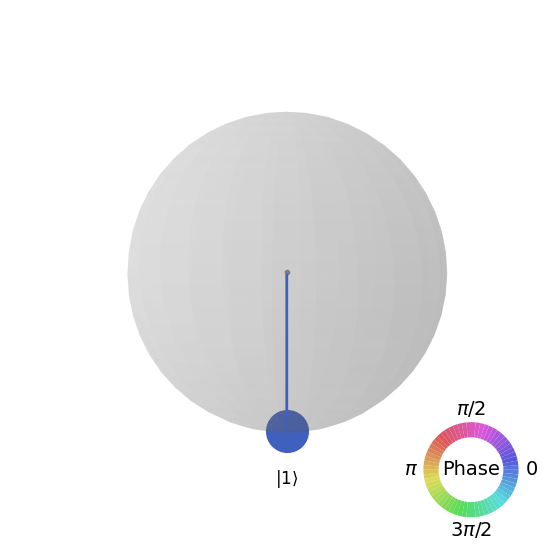

In [13]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
result = backend.run(qc).result() # Do the simulation, returning the result
qo = result.get_statevector() # output state vector
plot_state_qsphere(qo)

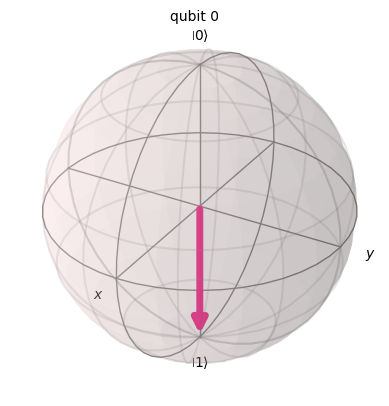

In [14]:
plot_bloch_multivector(qo)

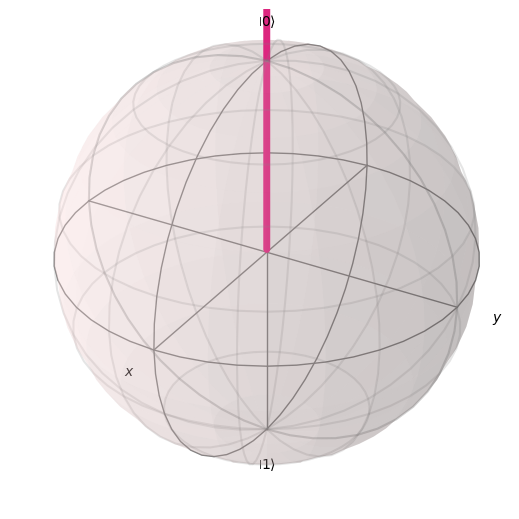

In [15]:
coords = [pi/2,0,1] # [Theta, Phi, Radius]

# Convert spherical to Cartesian coordinates
theta, phi, r = coords
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

# Cartesian coordinates
coords_cartesian = [x, y, z]

# Plot the Bloch vector using the Cartesian coordinates
plot_bloch_vector(coords_cartesian)
plot_bloch_vector(coords, coord_type='spherical') # Bloch Vector with spherical coordinates